# Week 7: Tennis Data Exploration

In [33]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import colors

data = pd.read_csv("tennis.csv")

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [47]:
def background_gradient(s, m, M, cmap='Wistia', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

data.corr().style.apply(background_gradient,
               cmap='Wistia',
               m=data.corr().min().min(),
               M=data.corr().max().max()
)

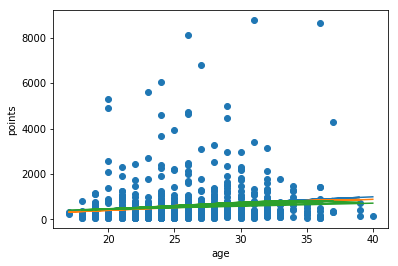

In [3]:
x = data["age"]
y = data["points"]
plt.scatter(x, y)
plt.xlabel("age")
plt.ylabel("points")
p1 = poly1d(polyfit(x, y, 1))
p2 = poly1d(polyfit(x, y, 2))
p3 = poly1d(polyfit(x, y, 3))
xu = x.unique()
plot(xu, p1(xu), xu, p2(xu), xu, p3(xu))

In [4]:
poly1d(polyfit(data["age"], data["points"], 2))(0)

-578.3045372326807

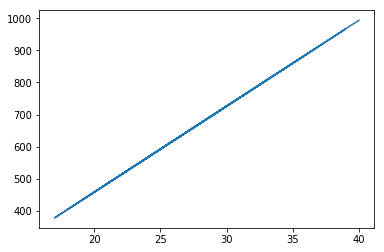

In [5]:
plot(xu, p1(xu))

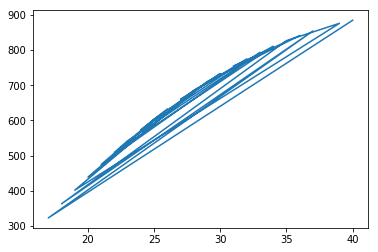

In [6]:
plot(xu, p2(xu))

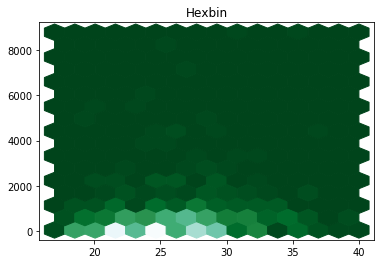

In [7]:
nbins = 15
title('Hexbin')
hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

Text(0,0.5,'points')

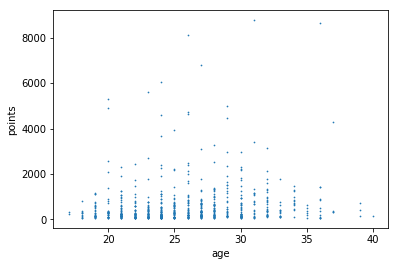

In [8]:
plot(x, y, linestyle='', marker='o', markersize=0.7)
xlabel("age")
ylabel("points")

# Height is an advantage

In [9]:
male_mean = data.loc[data["gender"] == "M"]["height"].mean()
print("Average height of men:", male_mean)
female_mean = data.loc[data["gender"] == "F"]["height"].mean()
print("Average height of women:", female_mean)

Average height of men: 185.64912280701753
Average height of women: 180.37142857142857


In [14]:
print("Average rank of male tall players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["ranking"].mean())
print("Average score of male tall players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["points"].mean())
print("\nAverage rank of male short players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["ranking"].mean())
print("Average score of male short players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["points"].mean())

Average rank of male tall players: 225.68085106382978
Average score of male tall players: 576.7287234042553

Average rank of male short players: 247.57835820895522
Average score of male short players: 438.2910447761194


In [15]:
print("Average rank of female tall players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] >= male_mean)]["ranking"].mean())
print("Average score of female tall players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] >= male_mean)]["points"].mean())
print("\nAverage rank of female short players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] < male_mean)]["ranking"].mean())
print("Average score of female short players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] < male_mean)]["points"].mean())

Average rank of female tall players: 230.8
Average score of female tall players: 811.5

Average rank of female short players: 161.46808510638297
Average score of female short players: 835.7787234042553


In [10]:
scores_men_tall = data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["points"]
scores_men_short = data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["points"]
t, p = stats.ttest_ind(scores_men_tall, scores_men_short)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 1.711723, P score: 0.043815


In [11]:
scores_women_tall = data.loc[np.logical_and(data["gender"] == "F", data["height"] >= female_mean)]["points"]
scores_women_short = data.loc[np.logical_and(data["gender"] == "F", data["height"] < female_mean)]["points"]
t, p = stats.ttest_ind(scores_women_tall, scores_women_short)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 1.860241, P score: 0.032030


# Being left-handed is an advantage

Initial investigation using simple data aggragation showed that left handed players hold higher ranks within the tennis board and on average they have more points than right handed players:

In [12]:
print("Average rank of right-handed players:", data.loc[data["hand"] == "R"]["ranking"].mean())
print("Average score of right-handed players:", data.loc[data["hand"] == "R"]["points"].mean())
print("\nAverage rank of left-handed players:", data.loc[data["hand"] == "L"]["ranking"].mean())
print("Average score of left-handed players:", data.loc[data["hand"] == "L"]["points"].mean())

Average rank of right-handed players: 215.72115384615384
Average score of right-handed players: 608.775641025641

Average rank of left-handed players: 186.56578947368422
Average score of left-handed players: 662.0263157894736


To investigate if left handed players have a significant advantage, we conduct a T-Test.

In [13]:
scoresL = data.loc[data["hand"] == "L"]["points"]
scoresR = data.loc[data["hand"] == "R"]["points"]
t, p = stats.ttest_ind(scoresL, scoresR)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 0.451694, P score: 0.325815


Our $t$-Test reveals a $p$-score of $0.325815$. Generally we reject our null-hypothesis when this score is less that $0.05$. From our data we can thus not conclude that left-handed players have a significant advantage over right-handed players.

# Resources

Links to the converters:
- https://surfstat.anu.edu.au/surfstat-home/tables/t.php
- http://www.socscistatistics.com/pvalues/tdistribution.aspx
- https://goodcalculators.com/student-t-value-calculator/